In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
evt_bc = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_bc.evt')

In [3]:
evt = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean.evt')

In [4]:
evt.info()

Filename: AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean.evt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   ()      
  1  Q0            1 BinTableHDU    146   793743R x 12C   [D, D, I, I, B, B, B, B, I, B, I, E]   
  2  Q1            1 BinTableHDU    146   794761R x 12C   [D, D, I, I, B, B, B, B, I, B, I, E]   
  3  Q2            1 BinTableHDU    146   772580R x 12C   [D, D, I, I, B, B, B, B, I, B, I, E]   
  4  Q3            1 BinTableHDU    146   738724R x 12C   [D, D, I, I, B, B, B, B, I, B, I, E]   
  5  VETOSPECTRUM    1 BinTableHDU     98   27513R x 4C   [D, D, 256I, B]   
  6  SSM Data      1 BinTableHDU    114   272R x 7C   [D, D, 256I, 512I, 512I, 512I, B]   
  7  TEMP          1 BinTableHDU    105   272R x 4C   [D, D, 16E, B]   
  8  Q0_GTI        1 BinTableHDU    114   154R x 2C   [1D, 1D]   
  9  Q1_GTI        1 BinTableHDU    114   154R x 2C   [1D, 1D]   
 10  Q2_GTI        1 BinTableHDU    114   183R x 2C   [

In [6]:
max_ind = 1801
grb_peak_time = 307372437.5

In [12]:
round_times = np.round((evt[1].data.field('Time')), 0)

In [13]:
round_peak = np.round(grb_peak_time, 0)

In [15]:
mid = int(np.size(np.where(round_times==round_peak))/2)

In [20]:
np.where(round_times==round_peak)[0][mid]

208327

In [21]:
min_ind = np.where(round_times==(round_peak-110))[0][0]

In [22]:
max_ind = np.where(round_times==(round_peak+20))[0][-1]

In [23]:
evt.info()

Filename: AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean.evt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   ()      
  1  Q0            1 BinTableHDU    146   793743R x 12C   ['D', 'D', 'I', 'I', 'B', 'B', 'B', 'B', 'I', 'B', 'I', 'E']   
  2  Q1            1 BinTableHDU    146   794761R x 12C   [D, D, I, I, B, B, B, B, I, B, I, E]   
  3  Q2            1 BinTableHDU    146   772580R x 12C   [D, D, I, I, B, B, B, B, I, B, I, E]   
  4  Q3            1 BinTableHDU    146   738724R x 12C   [D, D, I, I, B, B, B, B, I, B, I, E]   
  5  VETOSPECTRUM    1 BinTableHDU     98   27513R x 4C   [D, D, 256I, B]   
  6  SSM Data      1 BinTableHDU    114   272R x 7C   [D, D, 256I, 512I, 512I, 512I, B]   
  7  TEMP          1 BinTableHDU    105   272R x 4C   [D, D, 16E, B]   
  8  Q0_GTI        1 BinTableHDU    114   154R x 2C   [1D, 1D]   
  9  Q1_GTI        1 BinTableHDU    114   154R x 2C   [1D, 1D]   
 10  Q2_GTI        1 BinTableHD

In [24]:
evt_grb = evt
evt_grb[1].data = evt_grb[1].data[min_ind:max_ind]
evt_grb[2].data = evt_grb[2].data[min_ind:max_ind]
evt_grb[3].data = evt_grb[3].data[min_ind:max_ind]
evt_grb[4].data = evt_grb[4].data[min_ind:max_ind]

In [26]:
evt_grb.info()

Filename: AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean.evt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   ()      
  1  Q0            1 BinTableHDU    146   23945R x 12C   ['D', 'D', 'I', 'I', 'B', 'B', 'B', 'B', 'I', 'B', 'I', 'E']   
  2  Q1            1 BinTableHDU    146   23945R x 12C   ['D', 'D', 'I', 'I', 'B', 'B', 'B', 'B', 'I', 'B', 'I', 'E']   
  3  Q2            1 BinTableHDU    146   23945R x 12C   ['D', 'D', 'I', 'I', 'B', 'B', 'B', 'B', 'I', 'B', 'I', 'E']   
  4  Q3            1 BinTableHDU    146   23945R x 12C   ['D', 'D', 'I', 'I', 'B', 'B', 'B', 'B', 'I', 'B', 'I', 'E']   
  5  VETOSPECTRUM    1 BinTableHDU     98   27513R x 4C   [D, D, 256I, B]   
  6  SSM Data      1 BinTableHDU    114   272R x 7C   [D, D, 256I, 512I, 512I, 512I, B]   
  7  TEMP          1 BinTableHDU    105   272R x 4C   [D, D, 16E, B]   
  8  Q0_GTI        1 BinTableHDU    114   154R x 2C   [1D, 1D]   
  9  Q1_GTI        1 BinTable

In [27]:
evt_grb[1].data

FITS_rec([(3.07372328e+08, 1.09129843e+08, 42217,    199, 14, 185, 41,  4,      0, 0,  84,  47.137882),
          (3.07372328e+08, 1.09129843e+08, 42365,    318,  3, 254, 62, 48,      0, 0, 113,  61.79852 ),
          (3.07372328e+08, 1.09129843e+08, 42369,    555, 13, 215, 23,  2,      0, 0, 206, 108.211   ),
          ...,
          (3.07372458e+08, 1.09129974e+08, 40314,    325,  0, 151,  7, 54,      0, 0, 136,  73.201996),
          (3.07372458e+08, 1.09129974e+08, 40384,    231,  6, 255, 47, 32,      0, 0,  80,  45.49368 ),
          (3.07372458e+08, 1.09129974e+08, 41045,     67,  4, 251, 11, 32,      0, 0,  11,  10.74364 )],
         dtype=(numpy.record, [('Time', '>f8'), ('CZTSECCNT', '>f8'), ('CZTNTICK', '>i2'), ('PHA', '>i2'), ('DetID', 'u1'), ('pixID', 'u1'), ('DETX', 'u1'), ('DETY', 'u1'), ('veto', '>i2'), ('alpha', 'u1'), ('PI', '>i2'), ('ENERGY', '>f4')]))

In [28]:
evt_grb.writeto('test_quad_clean.evt', overwrite=True)

In [29]:
im1 = fits.open('test_grb_dpi.dpi')

In [30]:
im1.info()

Filename: test_grb_dpi.dpi
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      63   ()      
  1  Q0            1 ImageHDU        66   (64, 64)   float32   
  2  Q1            1 ImageHDU        66   (64, 64)   float32   
  3  Q2            1 ImageHDU        66   (64, 64)   float32   
  4  Q3            1 ImageHDU        66   (64, 64)   float32   
  5  FULL_DPI      1 ImageHDU        39   (128, 128)   float32   


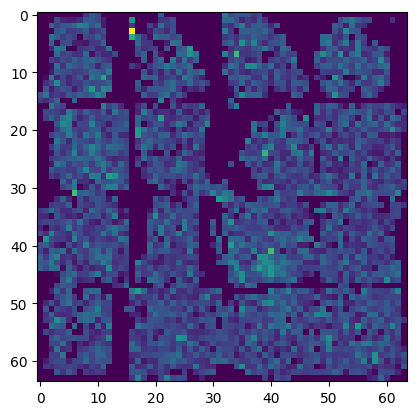

In [31]:
plt.imshow(im1[1].data)

In [32]:
q0_img = fits.open('test_grb_img.evt_Q0')
q1_img = fits.open('test_grb_img.evt_Q1')
q2_img = fits.open('test_grb_img.evt_Q2')
q3_img = fits.open('test_grb_img.evt_Q3')

In [33]:
im_data = [q0_img[1].data,q1_img[1].data,q2_img[1].data,q3_img[1].data ]

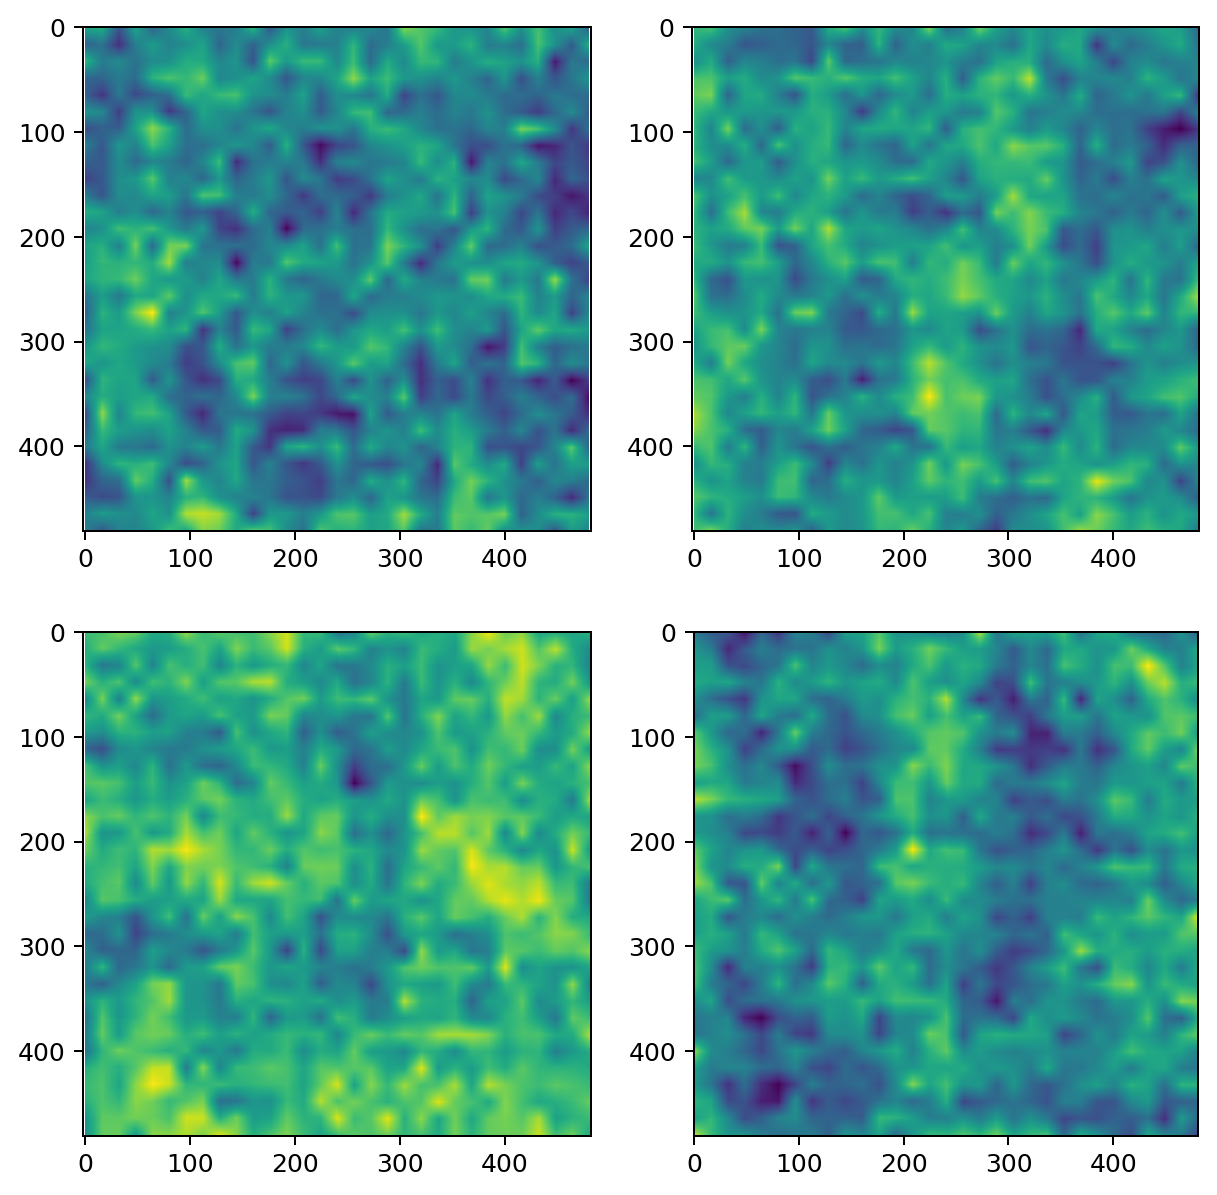

In [34]:
fig = plt.figure(figsize=(8,8), dpi=180)
for i in range(0,4):
    plt.axis('equal')
    plt.subplot(2,2,i+1)
    plt.imshow(im_data[i], cmap='viridis' )

In [79]:
evt_peak = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_bc.evt')

In [80]:
peak_min = np.where(round_peak==round_times)[0][mid]
peak_max = np.where(round_peak==round_times)[0][mid] + 1

In [81]:
evt_peak[1].data = evt_peak[1].data[peak_min:peak_max]
evt_peak[2].data = evt_peak[2].data[peak_min:peak_max]
evt_peak[3].data = evt_peak[3].data[peak_min:peak_max]
evt_peak[4].data = evt_peak[4].data[peak_min:peak_max]

In [82]:
evt_peak.info()

Filename: AS1A06_002T02_9000003206_21631cztM0_level2_bc.evt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      88   ()      
  1  Q0            1 BinTableHDU    122   1R x 12C   ['D', 'D', 'I', 'I', 'B', 'B', 'B', 'B', 'I', 'B', 'I', 'E']   
  2  Q1            1 BinTableHDU    122   1R x 12C   ['D', 'D', 'I', 'I', 'B', 'B', 'B', 'B', 'I', 'B', 'I', 'E']   
  3  Q2            1 BinTableHDU    122   1R x 12C   ['D', 'D', 'I', 'I', 'B', 'B', 'B', 'B', 'I', 'B', 'I', 'E']   
  4  Q3            1 BinTableHDU    122   1R x 12C   ['D', 'D', 'I', 'I', 'B', 'B', 'B', 'B', 'I', 'B', 'I', 'E']   
  5  VETOSPECTRUM    1 BinTableHDU     75   27513R x 4C   [D, D, 256I, B]   
  6  SSM Data      1 BinTableHDU     91   272R x 7C   [D, D, 256I, 512I, 512I, 512I, B]   
  7  TEMP          1 BinTableHDU     82   272R x 4C   [D, D, 16E, B]   
  8  GTI           1 BinTableHDU     79   351R x 2C   [1D, 1D]   
  9  Q0_GTI        1 BinTableHDU     79   154R x 2C  

In [83]:
evt_grb.writeto('peak_quad_clean.evt', overwrite=True)

In [85]:
peak_dpi = fits.open('peak_grb_dpi.dpi')

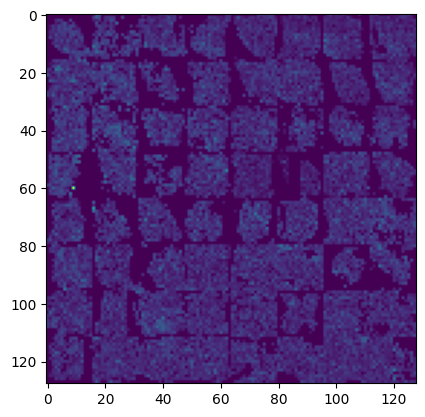

In [86]:
plt.imshow(peak_dpi[5].data)

In [87]:
peak_dph = fits.open('peak_grb_dph.dph')